# 순차 데이터와 순환 신경망(RNN)

**[핵심키워드]** 순차 데이터, 순환신경망, 셀, 은닉상태  

## 순차 데이터(sequential data)

- 텍스트나 시계열 데이터와 같이 순서에 의미가 있는 데이터

- 예.
    - 'I am a boy" vs "boy am a I" 
    - 일별 온도를 기록한 데이터

[참고] 순방향 신경망(feedforward network)
  - 네트워크에서 정보는 입력 노드로부터 출력 노드 방향으로 한 방향, 전방향으로만 움직이며, 숨겨진 노드가 있는 경우 이를 경유함
  - 네트워크 안에서 순환이나 루프는 존재하지 않음
  - 완전 연결 네트워크, 컨브넷 등

## 순환신경망(recurrent neural network, RNN)

### 뉴런의 출력이 다시 자기 자신으로 전달
- 데이터 재사용

### 예. A, B, C 3개 샘플을 처리하는 순환 신경망의 뉴런

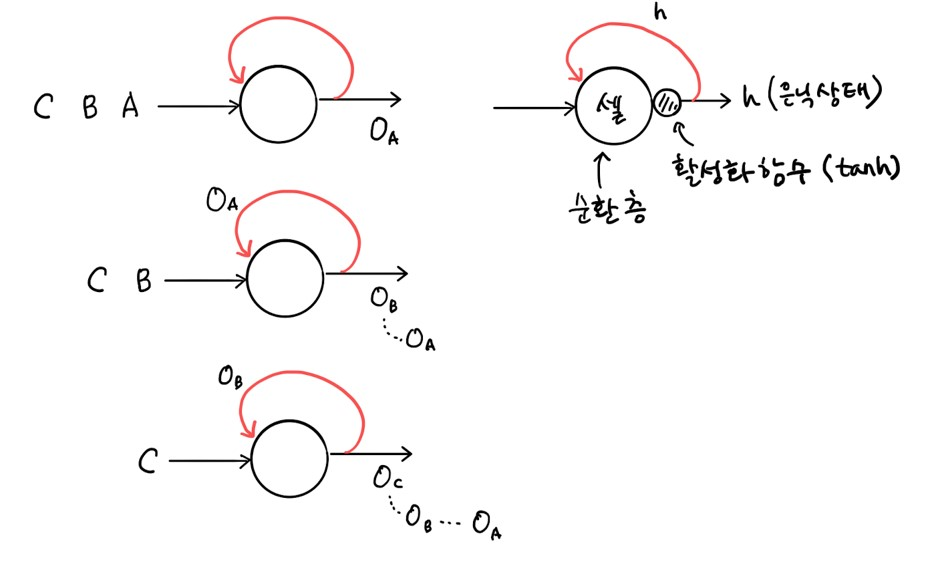

### 타임 스텝(time step)

- 순환 신경망에서 이전 샘플에 대한 정보를 이용하여 처리하는 한 단계

- 타임스텝이 오래될수록 순환하는 정보는 희미해짐
    - 최근 이용 정보가 더 많이 포함됨


### 셀(cell)
: 순환 신경망의 층


### 은닉 상태(hidden state)
- 한 셀에는 여러 개의 뉴런이 있지만 완전 연결 신경망과 달리 뉴런을 모두 표시하지 않고 하나의 셀로 층을 표현함. 이러한 셀의 출력을 은닉 상태라고 부름

### 은닉층의 활성화 함수 : 하이퍼볼릭 탄젠트 함수 tanh

- tanh 함수도 S자 모양을 띠므로 시그모이드 함수라고 부르기도 함
- 시그모이드함수와 다른 점은 -1 ~ 1 사이의 범위를 가짐

순환 신경망 그림에는 활성화함수를 표시하지 않는 경우가 많음

### 순환 신경망의 뉴런은 가중치가 하나 더 있음
- 이전 타임스텝의 은닉 상태에 곱해지는 가중치
- 셀은 입력과 이전 타임스텝의 은닉 상태를 사용하여 현재 타임스텝의 은닉상태를 만듬

### 타임스텝으로 펼친 순환 신경망
: 순환 신경망을 타입스텝마다 그리는 경우

- 2개의 가중치를 셀 안에 구분해서 표시  


- $w_x$ 는 입력에 곱해지는 가중치


- $w_h$ 는 이전 타입스텝의 은닉 상태에 곱해지는 가중치 



- 뉴런 마다 하나의 절편이 포함(따로 표시하지 않음)
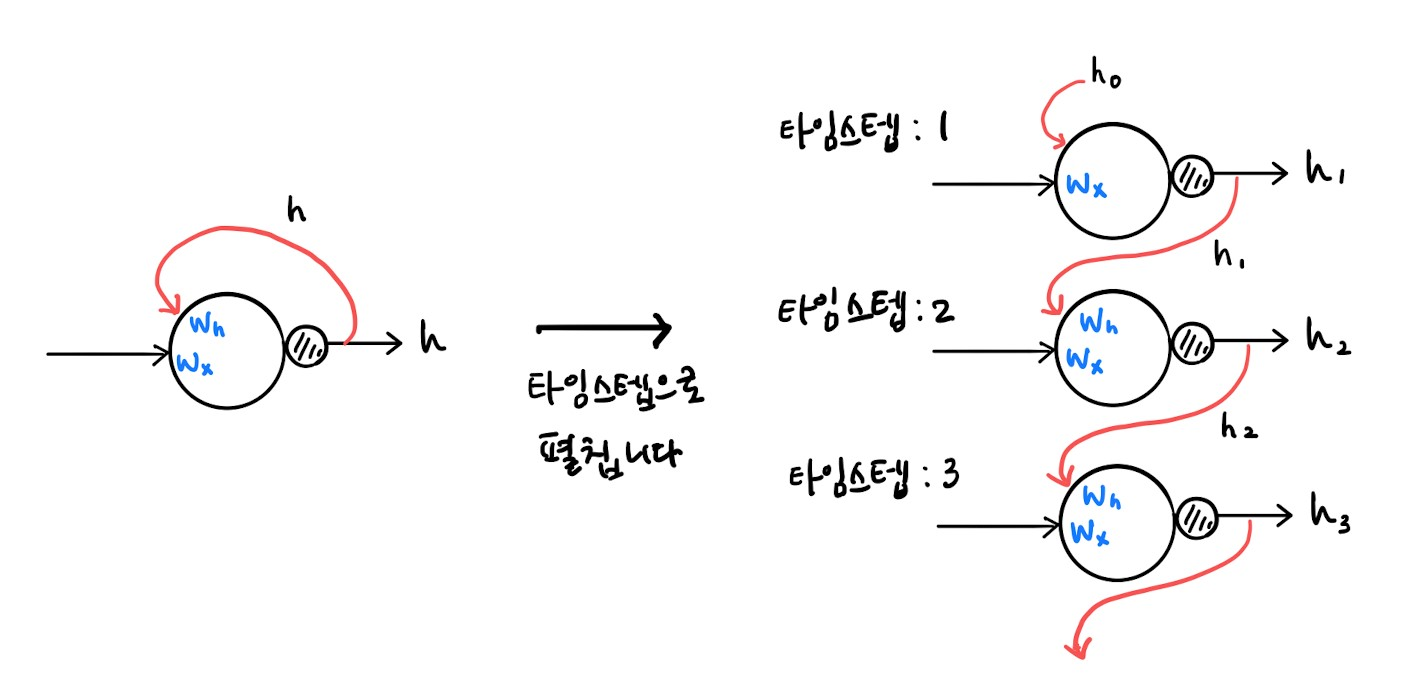


* 모든 스템에 사용되는 가중치 $w_h$는 하나이며, 타입스텝에 따라 변화하는 뉴런의 출력을 학습함

- 맨 처음 타임스텝1에서 사용되는 은닉 상태 $h_0$는 0으로 초기화

## 셀의 가중치

### 예. 입력되는 특성의 수 4개, 순환층의 뉴런이 3개인 경우

- 첫번재 뉴런($r_1$)의 은닉 상태가 다음 타임스텝에 재사용될 때 첫번째 뉴런($r_1$), 두번째 뉴런($r_2$), 세번째 뉴런($r_3$)에 모두 전달(빨간색 화살표)


- 두번재 뉴런($r_2$)의 은닉 상태가 다음 타임스텝에 재사용될 때 첫번째 뉴런($r_1$), 두번째 뉴런($r_2$), 세번째 뉴런($r_3$)에 모두 전달(파란색 화살표)


- 세번재 뉴런($r_3$)의 은닉 상태가 다음 타임스텝에 재사용될 때 첫번째 뉴런($r_1$), 두번째 뉴런($r_2$), 세번째 뉴런($r_3$)에 모두 전달(검은색 화살표)


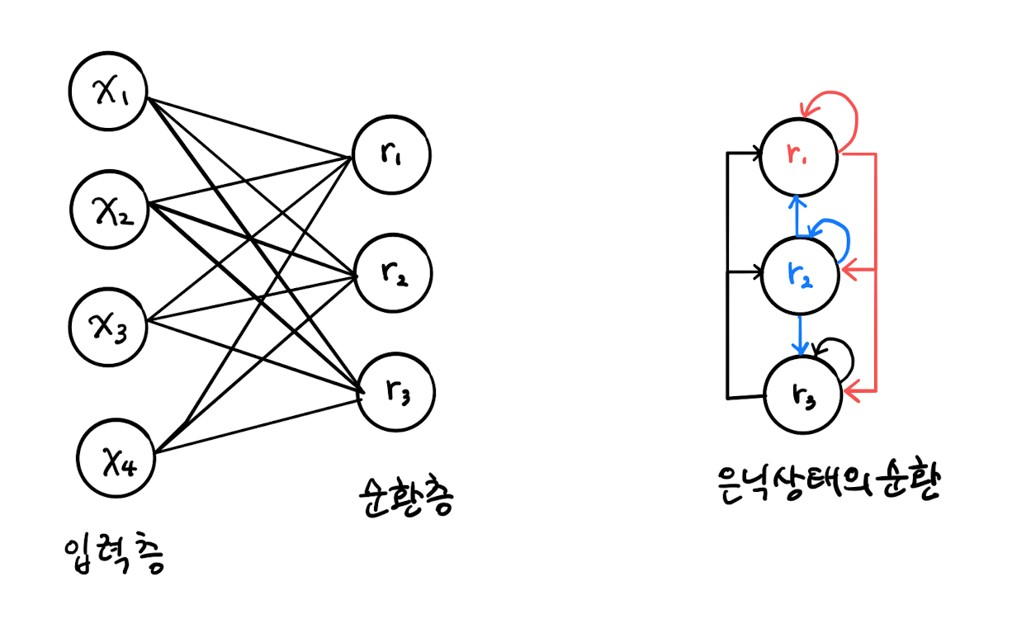

#### 셀의 가중치 
- 이 순환층에서 은닉 상태를 위한 가중치 $w_h$ 는 $3*3=9$개  

#### 모델 파라미터
- 모델 파라미터 수 $= w_x + w_h + 절편$
- 가중치에 절편을 더함
- 순환층은 모두 $12+9+3=24$ 개 모델 파라미터를 가짐

# 순환층의 입력

★ 참고. 합성곱 신경망의 경우
- 입력은 하나의 샘플이 3차원 : 너비, 높이, 깊이
- 합성곱 층과 풀링 층을 통과하면 너비, 높이, 채널(혹은 깊이)의 크기가 달라지지만 차원의 개수를 그대로 유지

### 예. 샘플 "I am a boy"

- 4개 단어로 구성  


- 각 단어를 3개의 어떤 숫자로 표현한다고 가정  


- 입력이 순환층을 통과하면 두번째, 세번째 차원이 사라지고 순환층의 뉴런 개수만큼 출력됨

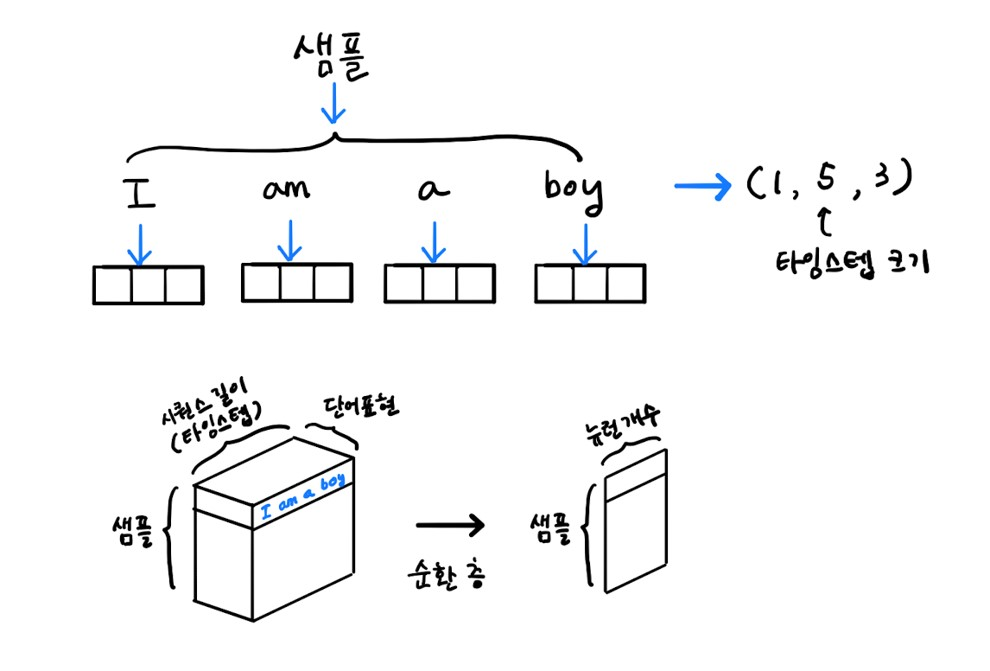

- 하나의 샘플은 시퀀스 길이(단어개수)와 단어표현의 2차원 배열  


- 순환층을 통과하면 1차원 배열로 변경됨
    - 1차원 배열의 크기는 순환층의 뉴런 개수에 의해 결정됨
    

- 순환층은 마지막 타임스텝의 은닉 상태만 출력으로 내보냄
    - 입력된 시퀀스 길이를 모두 읽어서 정보를 마지막 은닉 상태에 압축하여 전달하는 것처럼 보임
    - 정보를 기억하는 메모리를 가진다는 표현

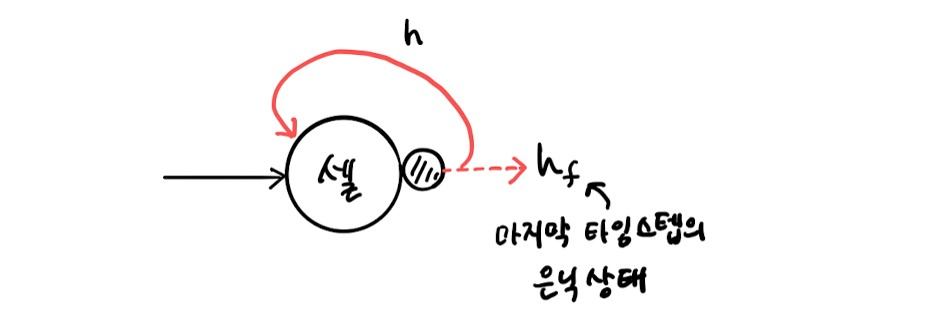

## 다층 순환 신경망
- 순환층을 여러 개 쌓은 순환 신경망


### 예. 2개의 순환층을 쌓은 경우

- 마지막 셀을 제외한 다른 모든 셀은 모든 타입스텝의 은닉상태를 출력


- 첫번째 셀은 모든 타임스텝의 은닉상태를 출력
- 두번째 셀은 마지막 타입스텝의 은닉상태만 출력

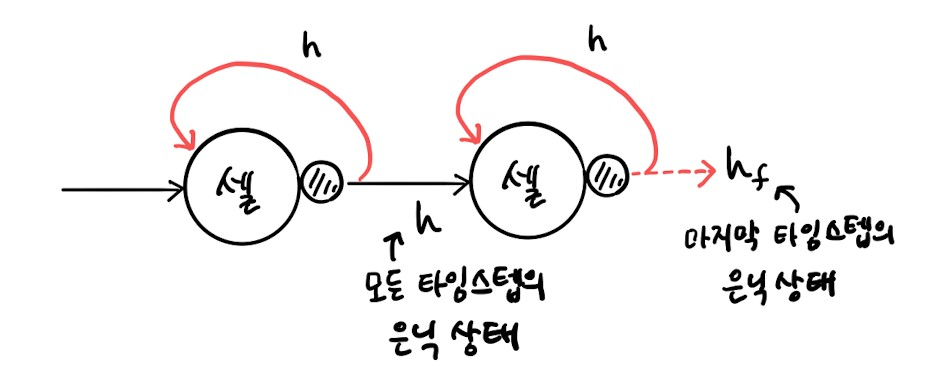

## 순환신경망의 출력층

- 합성곱 신경망과 같이 마지막에 밀집층을 두어 클래스를 분류

- 다중 분류인 경우 출력층에 클래스 개수만큼 뉴런을 두고 소프트맥스 활성화 함수를 사용

- 이진 분류일 경우 하나의 뉴런을 두고 시그모이드 활성화 함수 사용

### 합성곱 신경망과 차이점

- 마지막 셀의 출력이 1차원이므로 Flatten 클래스로 펼칠 필요가 없음

- 셀의 출력을 그대로 밀집층에 사용

###  예.  다중분류 문제를 위한 순환 신경망 구조

- 입력 샘플의 크기가 (20, 100)  


- 하나의 순환층을 사용  


- 샘플은 20개 타입스텝으로 이루어짐


- 각 타임스텝은 100개의 표현 또는 특성으로 이루어짐

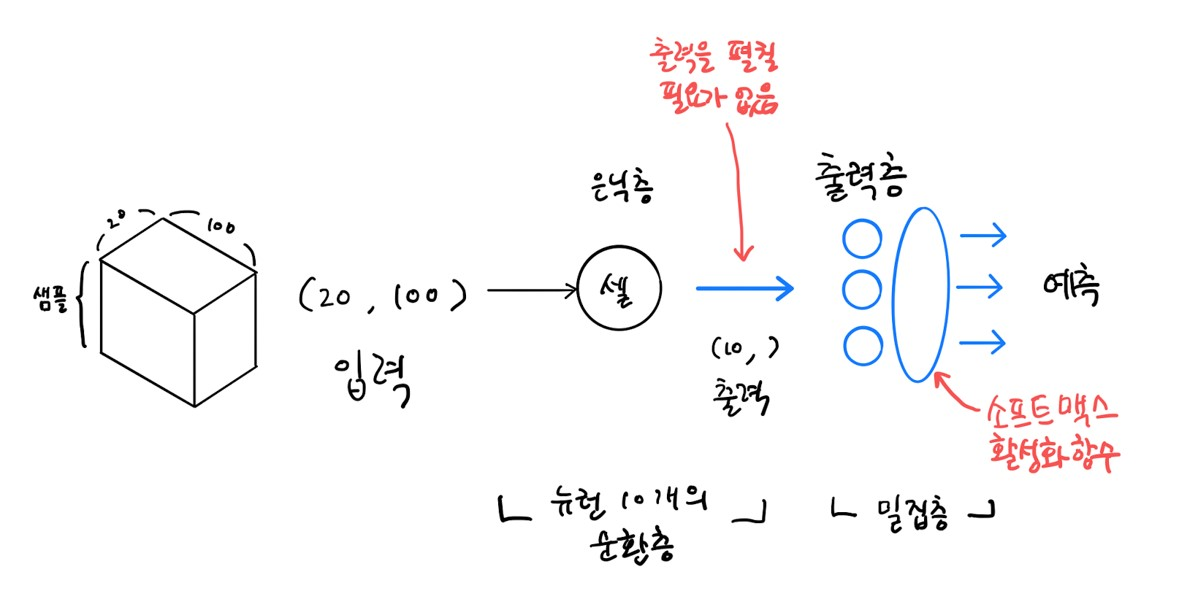

- 샘플이 순환층의 셀을 통과하면 모든 타임스텝을 처리하고 난 후의 은닉상태만 출력됨

- 은닉상태의 크기는 셀에 있는 뉴런의 개수가 되므로 (10,  )

- 샘플마다 셀이 1차원 배열을 출력하므로 합성곱 신경망처럼 Flatten 클래스로 펼칠 필요없이 바로 출력층에 연결

### [마무리]

- 순차데이터
- 순환신경망
- 셀
- 은닉상태

---